In [135]:
import xarray as xr

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units

# Get Data

In [142]:
ds = xr.load_dataset('D:/Projects/fiji-training-2024/data/for_skewt.f000', engine='cfgrib')

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'typeOfLevel': 'meanSea'}
    filter_by_keys={'typeOfLevel': 'hybrid'}
    filter_by_keys={'typeOfLevel': 'atmosphere'}
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'planetaryBoundaryLayer'}
    filter_by_keys={'typeOfLevel': 'isobaricInPa'}
    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
    filter_by_keys={'typeOfLevel': 'heightAboveSea'}
    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}
    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}
    filter_by_keys={'typeOfLevel': 'highCloudLayer'}
    filter_by_keys={'typeOfLevel': 'cloudCeiling'}
    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
    filter_by_keys={'typeOfLevel': 'tropopause'}
    filter_by_keys={'typeOfLevel': 'maxWind'}
    filter_by_keys={'typeOfLevel': 'isothermZero'}
    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}
    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigmaLayer'}
    filter_by_keys={'typeOfLevel': 'sigma'}
    filter_by_keys={'typeOfLevel': 'potentialVorticity'}

In [143]:
ds = xr.load_dataset('D:/Projects/fiji-training-2024/data/for_skewt.f000', engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'isobaricInhPa'}})

ds

skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "C:\Users\Rifani\anaconda3\envs\grib-handle\lib\site-packages\cfgrib\dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "C:\Users\Rifani\anaconda3\envs\grib-handle\lib\site-packages\cfgrib\dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
      

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, latitude: 121, longitude: 61)
Coordinates:
    time           datetime64[ns] 2024-06-19
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 -35.0 -34.75 -34.5 ... -5.5 -5.25 -5.0
  * longitude      (longitude) float64 165.0 165.2 165.5 ... 179.5 179.8 180.0
    valid_time     datetime64[ns] 2024-06-19
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 77.05 ... 4.7...
    t              (isobaricInhPa, latitude, longitude) float32 288.3 ... 259.3
    r              (isobaricInhPa, latitude, longitude) float32 74.6 ... 0.0
    q              (isobaricInhPa, latitude, longitude) float32 0.008039 ... ...
    w              (isobaricInhPa, latitude, longitude) float32 0.004196 ... ...
    wz             (isobaricInhPa, latitude, longitude) float32 -0.000368 ......
    u              (isobaricInhPa, latitude, longitude) float32 2.854 ... 3.257
    v              (isobaricInhPa, latitude, longitude) float32 -2.048 ... -7.5
    absv           (isobaricInhPa, latitude, longitude) float32 -4.998e-05 .....
    o3mr           (isobaricInhPa, latitude, longitude) float32 5.349e-08 ......
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-06-24T07:50 GRIB to CDM+CF via cfgrib-0.9.1...

In [118]:
# set lat and lon
lat = -18.0
lon = 178.0

# extract data
data_holder = []
for level in ds.isobaricInhPa:
    lv = level.values
    gh = ds['gh'].interp(latitude=lat, longitude=lon,isobaricInhPa=level,method='linear').values
    t = ds['t'].interp(latitude=lat, longitude=lon,isobaricInhPa=level,method='linear').values
    r = ds['r'].interp(latitude=lat, longitude=lon,isobaricInhPa=level,method='linear').values
    u = ds['u'].interp(latitude=lat, longitude=lon,isobaricInhPa=level,method='linear').values
    v = ds['v'].interp(latitude=lat, longitude=lon,isobaricInhPa=level,method='linear').values
    data_holder.append([lv, gh, t, r, u, v])

In [120]:
df = pd.DataFrame(data_holder, columns=['level', 'gh', 't', 'r', 'u', 'v'])
# Filter the level to only include below 100 hPa
df = df[df['level']>=100]

## Calculate Required Parameter

In [121]:
temperature = df['t'].astype(float).values * units.kelvin
rh = df['r'].astype(float).values * units.percent
# derive dewpoint
dpt = mpcalc.dewpoint_from_relative_humidity(temperature, rh)
df['dpt'] = dpt
df

,level,gh,t,r,u,v,dpt
0,1000.0,109.01319885253906,303.17620849609375,53.79999923706055,-0.8264014720916748,-0.617633581161499,19.655803
1,975.0,328.74395751953125,301.7261962890625,53.900001525878906,-0.8507471084594727,-0.6352441310882568,18.342976
2,950.0,558.1119384765625,299.6451416015625,56.29999923706055,-1.0739014148712158,-1.0465917587280273,17.100769
3,925.0,792.8409423828125,297.2551574707031,62.400001525878906,-0.9300292730331421,-1.346364140510559,16.479516
4,900.0,1032.0758056640625,294.9430236816406,69.19999694824219,-0.6687646508216858,-1.5347094535827637,15.904380
5,850.0,1525.3468017578125,290.60760498046875,80.30000305175781,-0.08929198980331421,-1.7113476991653442,14.030707
6,800.0,2043.167236328125,289.5776062011719,49.20000076293945,0.045656733214855194,-1.5839306116104126,5.747789
7,750.0,2589.815185546875,287.1244201660156,33.79999923706055,0.3435595631599426,-2.5348241329193115,-1.719561
8,700.0,3167.972412109375,284.1312561035156,28.299999237060547,1.5393823385238647,-3.9048900604248047,-6.698270
9,650.0,3781.9365234375,280.7781066894531,36.099998474121094,3.073662042617798,-5.219064712524414,-6.467679


In [138]:
p = df['level'].astype(float).values * units.hPa
u = df['u'].astype(float).values * units('m/s')
v = df['v'].astype(float).values * units('m/s')
t = df['t'].astype(float).values * units.kelvin
dpt = df['dpt'].astype(float).values * units.degC
spd = mpcalc.wind_speed(u,v)

In [132]:
# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], t[0], dpt[0])

print(lcl_pressure, lcl_temperature)

# Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(p, t[0], dpt[0]).to('degC')

860.1453018217862 hectopascal 290.4031695767926 kelvin


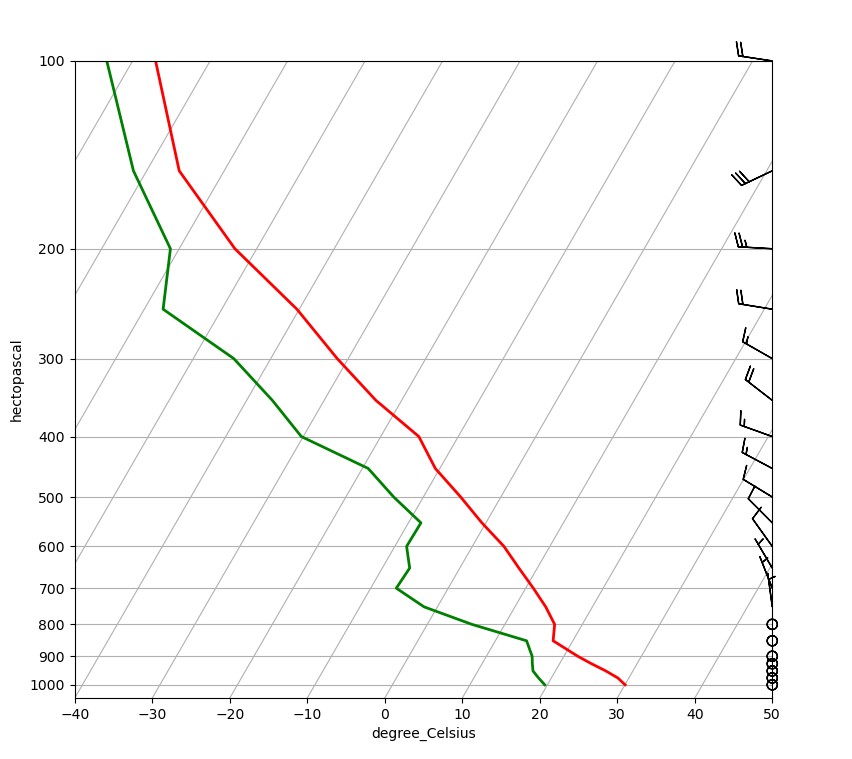

In [133]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, t, 'r', linewidth=2)
skew.plot(p, dpt, 'g', linewidth=2)
skew.plot_barbs(p, u, v)

# Show the plot
plt.show()

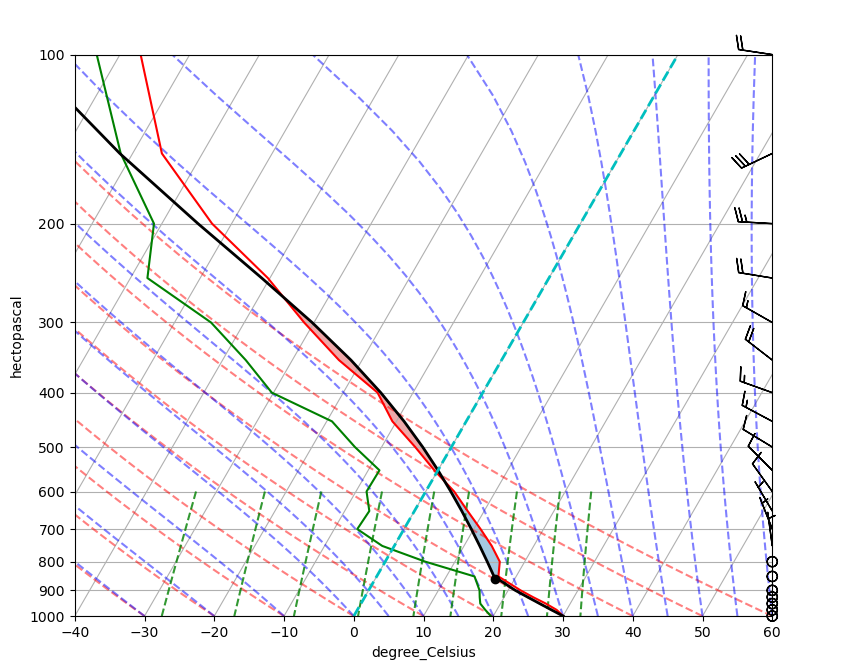

In [134]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, t, 'r')
skew.plot(p, dpt, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Plot LCL temperature as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Plot the parcel profile as a black line
skew.plot(p, parcel_prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, t, parcel_prof, dpt)
skew.shade_cape(p, t, parcel_prof)

# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Show the plot
plt.show()

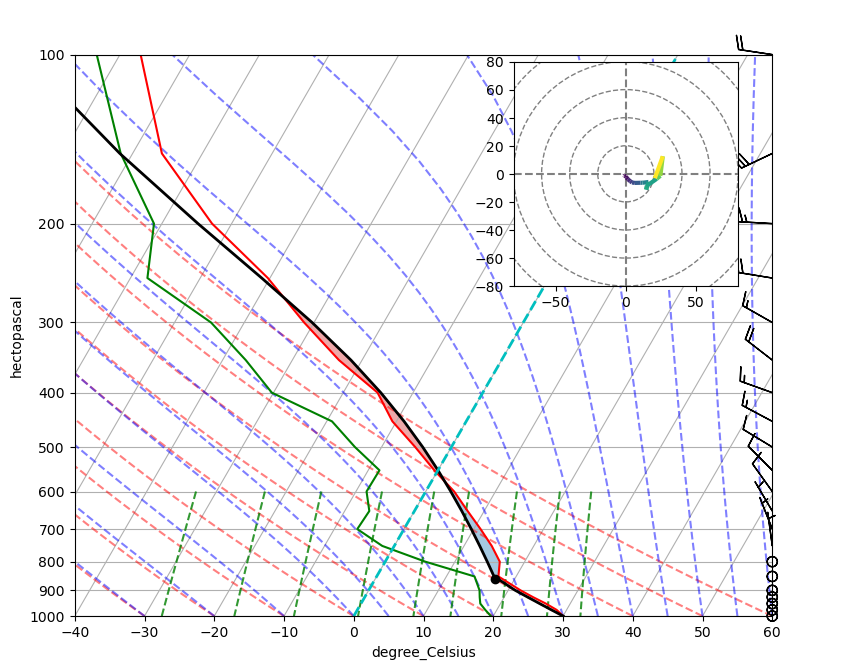

In [139]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, t, 'r')
skew.plot(p, dpt, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Plot LCL as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Plot the parcel profile as a black line
skew.plot(p, parcel_prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, t, parcel_prof, dpt)
skew.shade_cape(p, t, parcel_prof)

# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Create a hodograph
# Create an inset axes object that is 40% width and height of the
# figure and put it in the upper right hand corner.
ax_hod = inset_axes(skew.ax, '40%', '40%', loc=1)
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, spd)  # Plot a line colored by wind speed

# Show the plot
plt.show()